In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [2]:
# 1. Generate dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# 2. Scale and split (train and test)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

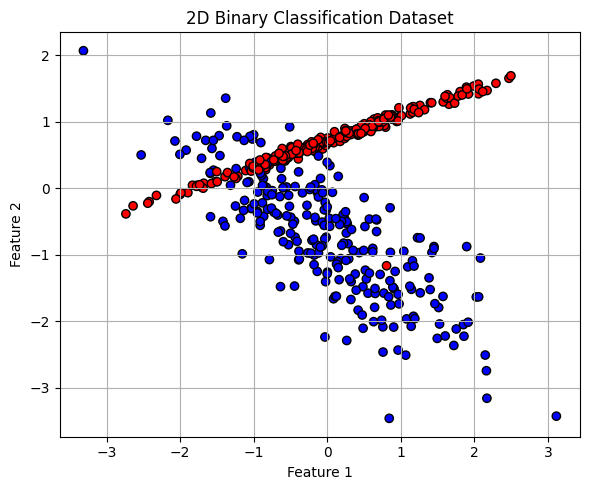

In [3]:
# 4. Visualize dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("2D Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 5. Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [6]:
model = SimpleNN(input_dim=2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [7]:
# 6. Train the model
num_epochs = 30
train_accuracies = []
test_accuracies = []
losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Training accuracy
        train_preds = (outputs >= 0.5).float()
        train_acc = accuracy_score(y_train_tensor.numpy(), train_preds.numpy())

        # Test accuracy
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float()
        test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    losses.append(loss.item())

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item():.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_acc:.4f}")


Epoch 1/30 - Loss: 0.6453 - Train Acc: 0.5375 - Test Acc: 0.5100
Epoch 2/30 - Loss: 0.6361 - Train Acc: 0.5475 - Test Acc: 0.5400
Epoch 3/30 - Loss: 0.6272 - Train Acc: 0.5550 - Test Acc: 0.5500
Epoch 4/30 - Loss: 0.6186 - Train Acc: 0.5650 - Test Acc: 0.5600
Epoch 5/30 - Loss: 0.6105 - Train Acc: 0.5750 - Test Acc: 0.5700
Epoch 6/30 - Loss: 0.6027 - Train Acc: 0.5925 - Test Acc: 0.6000
Epoch 7/30 - Loss: 0.5952 - Train Acc: 0.6175 - Test Acc: 0.6000
Epoch 8/30 - Loss: 0.5877 - Train Acc: 0.7075 - Test Acc: 0.7100
Epoch 9/30 - Loss: 0.5804 - Train Acc: 0.7950 - Test Acc: 0.7700
Epoch 10/30 - Loss: 0.5732 - Train Acc: 0.8300 - Test Acc: 0.8200
Epoch 11/30 - Loss: 0.5661 - Train Acc: 0.8475 - Test Acc: 0.8300
Epoch 12/30 - Loss: 0.5591 - Train Acc: 0.8725 - Test Acc: 0.8400
Epoch 13/30 - Loss: 0.5522 - Train Acc: 0.8700 - Test Acc: 0.8400
Epoch 14/30 - Loss: 0.5455 - Train Acc: 0.8675 - Test Acc: 0.8500
Epoch 15/30 - Loss: 0.5389 - Train Acc: 0.8675 - Test Acc: 0.8500
Epoch 16/30 - Loss:

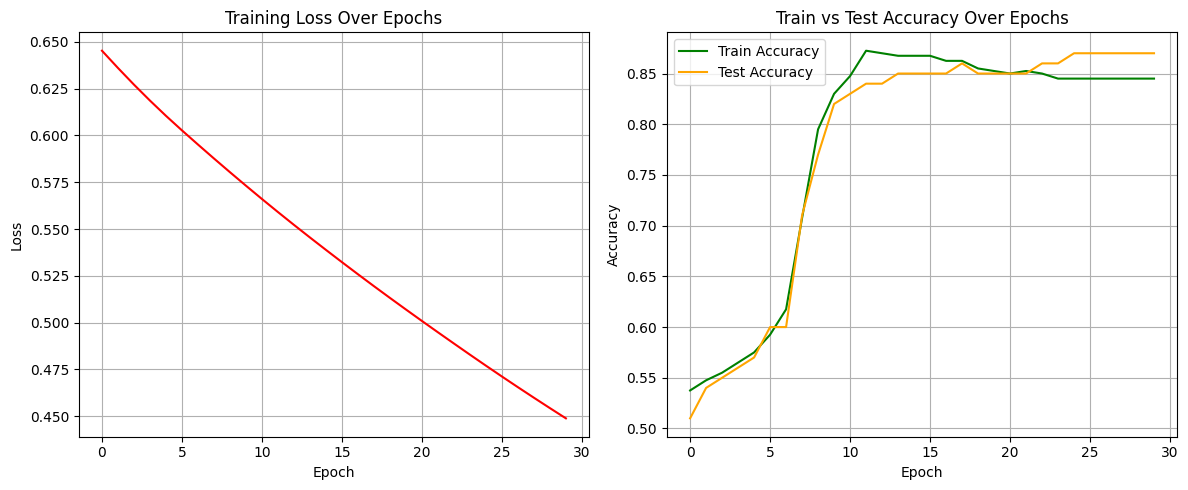

In [8]:
# 7. Plot loss and combined accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss", color='red')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Combined Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy", color='green')
plt.plot(test_accuracies, label="Test Accuracy", color='orange')
plt.title("Train vs Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()